# EDA Algerian Forest Fires 

## 1) Problem Statement
This project, focuses on whether certain weather features could predict forest fires in some regions in Algeria using few Classification algorithms.

## 2) Data Source
https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

## 3) About the dataset

The dataset includes 246 observations that is a regroup of data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

There are 123 observations for each region. 

The period considered here for observation is from June 2012 to September 2012. 
The dataset includes 11 input features (day, month,	year together considered as date) and 1 output attribue (Classes).

## 4) Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## 5) Preparing the dataset

In [46]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (6) (1).csv', header=1)
df.columns = df.columns.str.strip()

In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## 6) Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) - Date of the data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely 'Fire' and 'Not fire'

## 7) Data cleaning of the target feature (Classes)

In [48]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

#### So it seems that the data have been misspaced. We can use str.strip() method to fix this. 

In [49]:
df['Classes'] = Data['Classes'].str.strip()

In [50]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

#### So there are 138 records with output value as 'fire' and 106 records with output value as 'not fire'.

## 8) Check if there are any missing values

In [51]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [52]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,NaN


#### There are no such missing records observed.
#### So till the index 121, the region is Bejaia and from index 124, the region is Sidi-Bel Abbes.

#### We can seperate the dataset into two subgroups on the basis of region and make new column 'Region' in each subgroup to specify the region. The subgroups can then be rejoined to form a new dataset.

In [60]:
df1=df.iloc[:122]
df2=df.iloc[124:]

In [61]:
df1['Region'] = 'Bejaia'
df2['Region'] = 'Sidi Bel-abbes'

In [62]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [63]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi Bel-abbes
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi Bel-abbes


In [64]:
Data = pd.concat([df1, df2])

In [65]:
Data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### Now there are no missing values in the newly framed dataset (Data).

## 9) Check if there are any duplicate date in the dataset

In [66]:
df.duplicated().sum()

0

#### So, no duplicate data found. 

## 10) Check the datatypes

In [67]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


#### So the datatype of all the features is object or string.
#### There are 244 values for each feature. So there are a total of 144 records in the dataset 'Data'.
#### There are no null-values in any feature. 

## 11) Change the datatype of the features with numerical values

In [68]:
Data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 
      'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = Data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 
                                                 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].apply(pd.to_numeric, errors='coerce')

In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


## 12) Find the average 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', and 'FWI' in the two regions

In [70]:
Data.groupby('Region').mean()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Region,,,,,,,,,,,,,
Bejaia,15.754098,7.5,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
Sidi Bel-abbes,15.754098,7.5,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.670248,5.892623,17.903279,8.504959


## Observation and Inference
#### As compared to Sidi Bel-abbes region, Bejaia region experiences higher relative humidity, higher wind speed, higher rainfall and has a higher drought code. 
#### On the other hand, Sidi Bel-abbes region experiences higher temperature, has a higher Fine Fuel Moisture Code, higher Initial Spread Index, higher Buildup Index, and higher Fire Weather Index.

## 13) Show how temperature influences the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

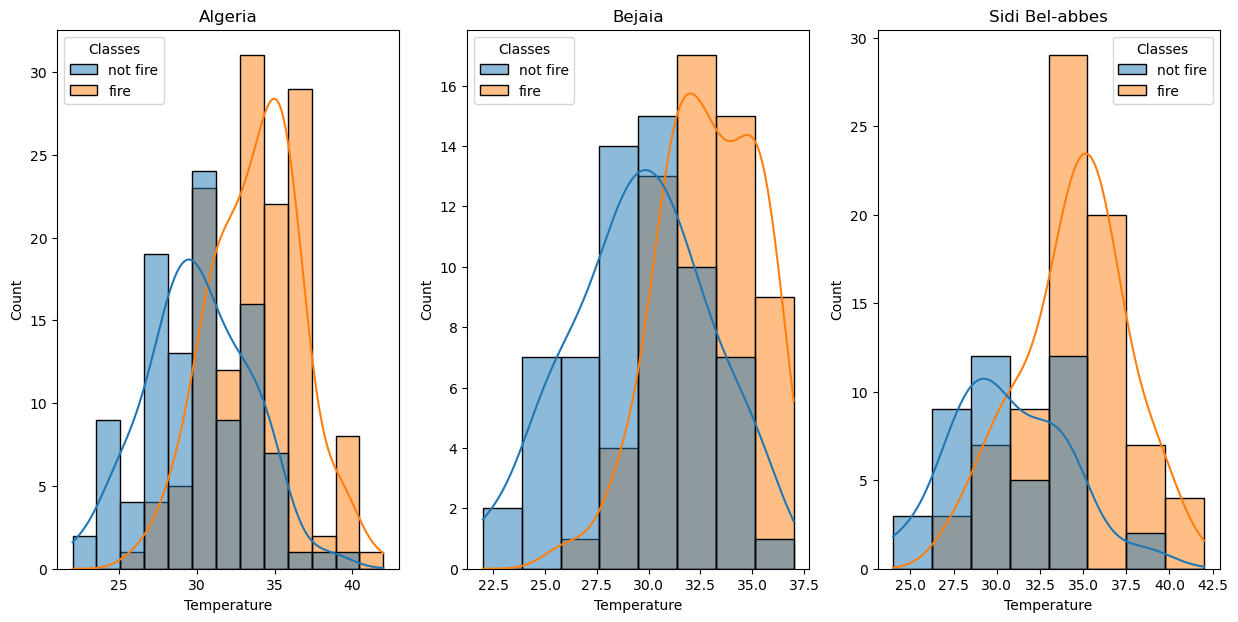

In [71]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=Data, x='Temperature', kde=True, hue='Classes')
plt.title('Algeria')
plt.subplot(132)
sns.histplot(data=Data[Data['Region']=='Bejaia'], x='Temperature', kde=True, hue='Classes')
plt.title('Bejaia')
plt.subplot(133)
sns.histplot(data=Data[Data['Region']=='Sidi Bel-abbes'], x='Temperature', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

## Observation and Inference 
#### Overall in Algeria, higher temperature leads to a higher possibility of forest fire.
#### Higher temperature leads to a higher possibility of forest fire in both Bejaia and Sidi Bel-abbes regions of Algeria. 
#### The observation holds strongly for Sidi Bel-abbes region.

## 14) Show how humidity (RH) influences the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

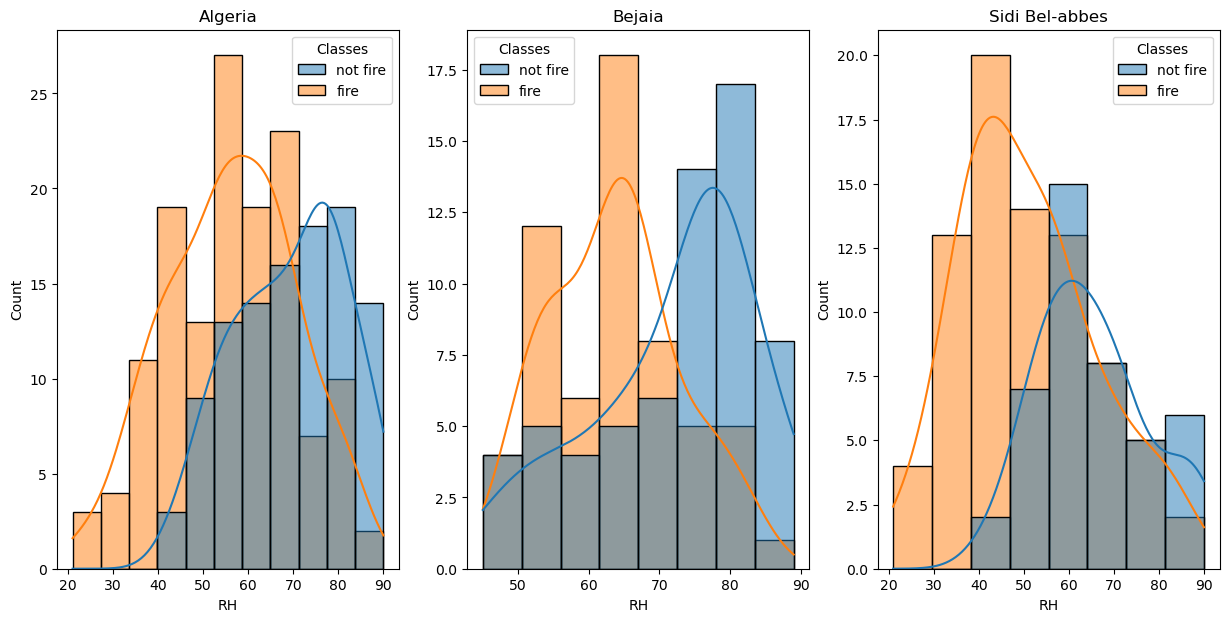

In [23]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=Data, x='RH', kde=True, hue='Classes')
plt.title('Algeria')
plt.subplot(132)
sns.histplot(data=Data[Data['Region']=='Bejaia'], x='RH', kde=True, hue='Classes')
plt.title('Bejaia')
plt.subplot(133)
sns.histplot(data=Data[Data['Region']=='Sidi Bel-abbes'], x='RH', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

## Observation and Inference 
#### There is a strong effect of humidity on the possibility of forest fire in Algeria. It shows that with higher humidity (RH) the chance of forest fire decreases. 
#### There is a strong evidence of the above observation in the Begaia region but the effect is not very significant in the Sidi Bel-abbes region.

## 15) Show the effect of wind speed on the chance of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

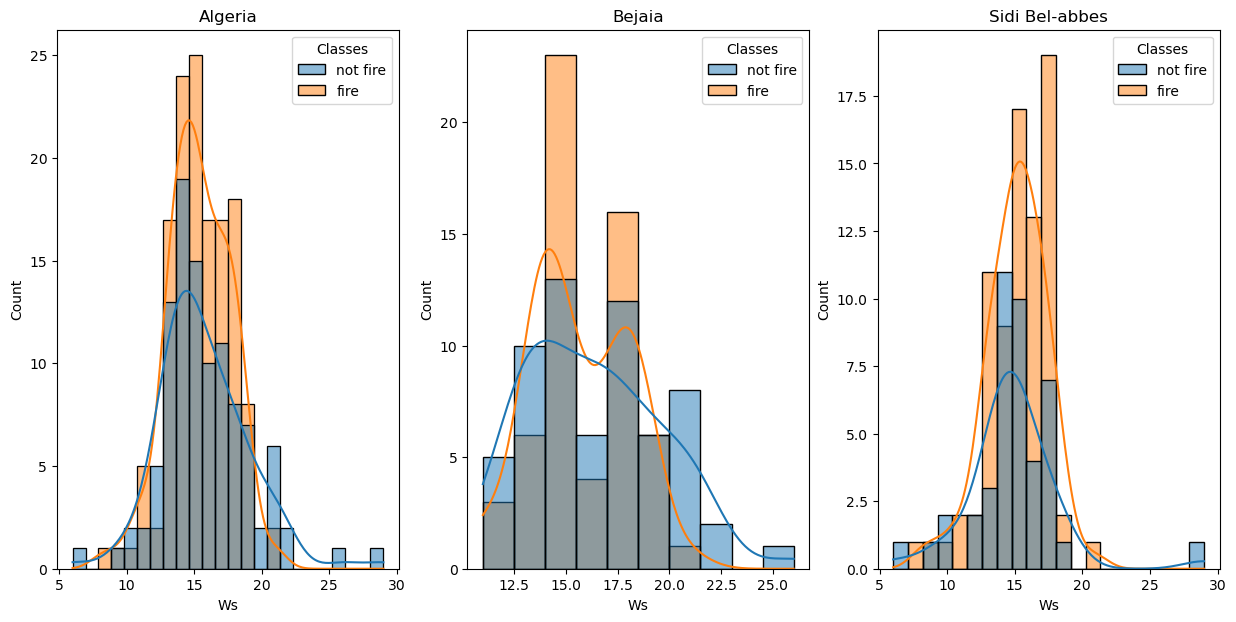

In [79]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=Data, x='Ws', kde=True, hue='Classes')
plt.title('Algeria')
plt.subplot(132)
sns.histplot(data=Data[Data['Region']=='Bejaia'], x='Ws', kde=True, hue='Classes')
plt.title('Bejaia')
plt.subplot(133)
sns.histplot(data=Data[Data['Region']=='Sidi Bel-abbes'], x='Ws', kde=True, hue='Classes')
plt.title('Sidi Bel-abbes')

## Observations and Insights
#### There is no effect of windspeed on the occurance of forest fire in Alageria. 
#### The result holds true for both Bejaia and Sidi Bel-abbes.

## 16) Show the effect of rainfall on the possibility of forest fire

Text(0.5, 1.0, 'Sidi Bel-abbes')

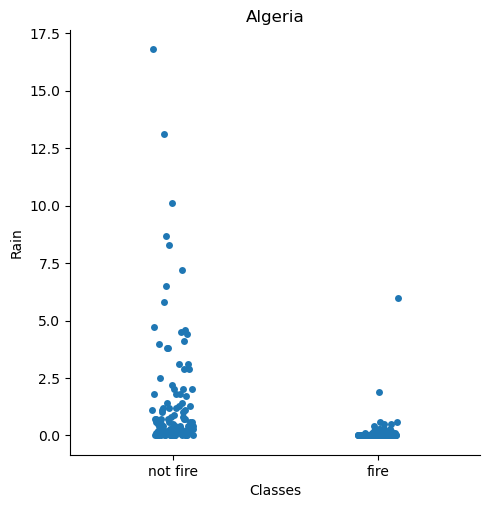

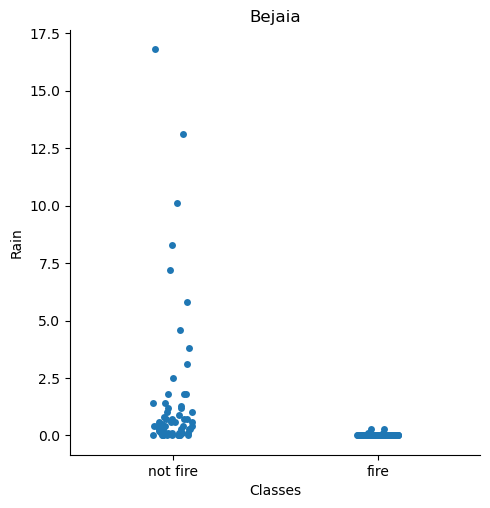

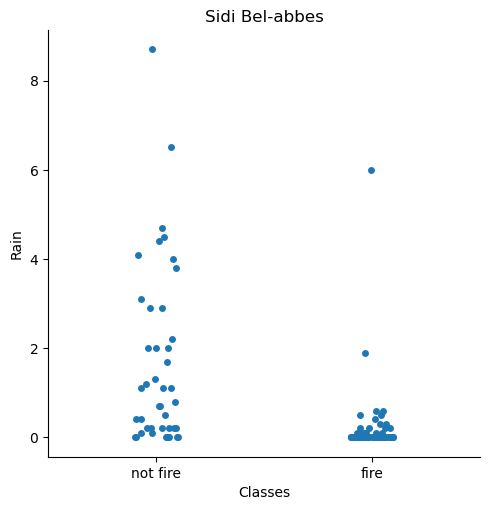

In [24]:
sns.catplot(data=Data, x='Classes', y='Rain')
plt.title('Algeria')
sns.catplot(data=Data[Data.Region=='Bejaia'], x='Classes', y='Rain')
plt.title('Bejaia')
sns.catplot(data=Data[Data.Region=='Sidi Bel-abbes'], x='Classes', y='Rain')
plt.title('Sidi Bel-abbes')

## Observations and Insights 
#### Rainfall reduces the chance of forest fire.
#### The obsrvation holds true for both Bejaia and Sidi Bel-abbes regions of Algeria. 

## 17) Show the month wise rainfall analysis 

Text(0.5, 1.0, 'Sidi Bel-abbes')

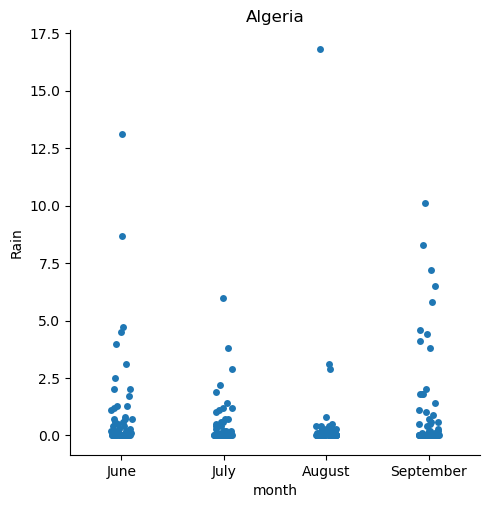

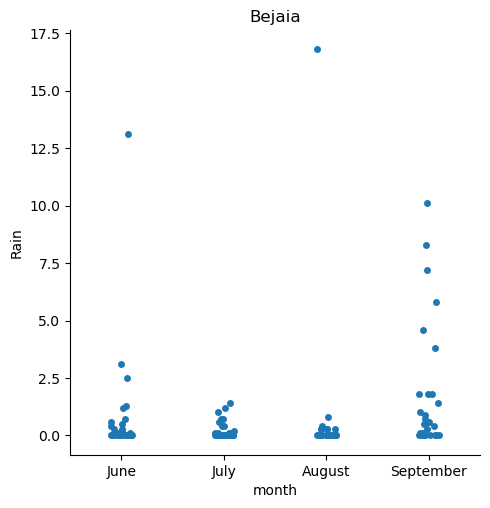

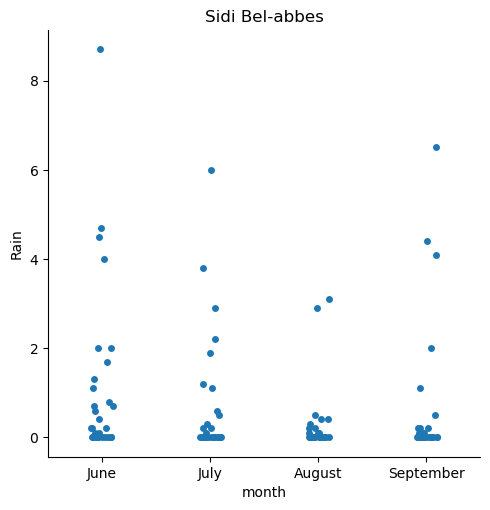

In [83]:
sns.catplot(data=Data, x='month', y='Rain')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Algeria')
sns.catplot(data=Data[Data.Region=='Bejaia'], x='month', y='Rain')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Bejaia')
sns.catplot(data=Data[Data.Region=='Sidi Bel-abbes'], x='month', y='Rain')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Sidi Bel-abbes')

## Observations and Insights
#### In Algeria most of the rainfall ocuurs in the month of June and September and the rainfall is least in the month of August.
#### Similar observations can be found in both Bejaia and Sidi Bel-abbes. However, in Sidi Bel-abbes, heavy rainfall occurs also in the month of July.

## 18) Show the month wise temperature analysis 

Text(0.5, 1.0, 'Sidi Bel-abbes')

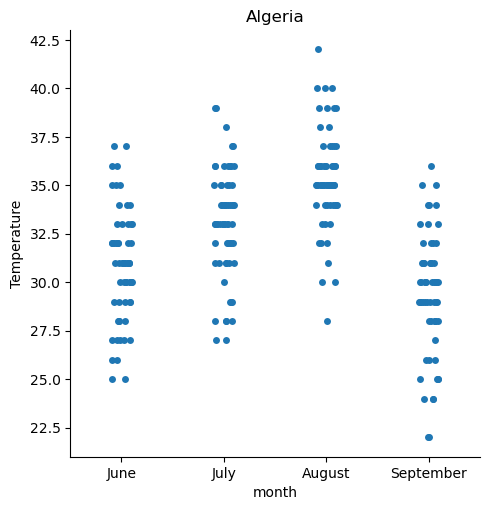

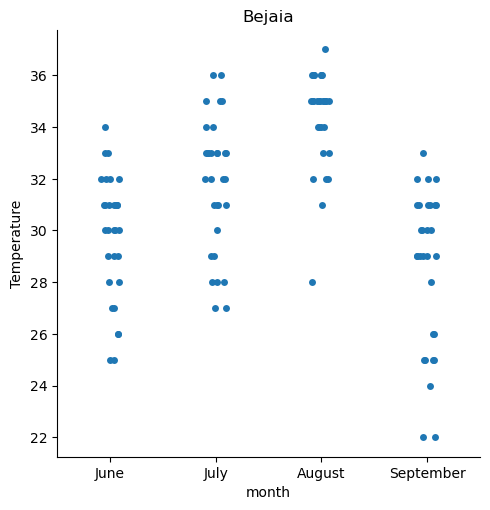

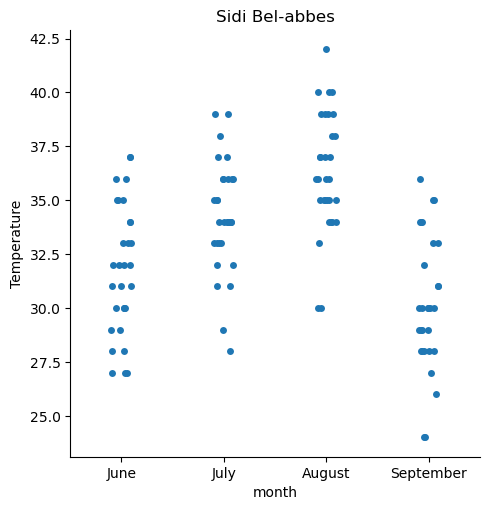

In [82]:
sns.catplot(data=Data, x='month', y='Temperature')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Algeria')
sns.catplot(data=Data[Data.Region=='Bejaia'], x='month', y='Temperature')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Bejaia')
sns.catplot(data=Data[Data.Region=='Sidi Bel-abbes'], x='month', y='Temperature')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.title('Sidi Bel-abbes')

## Observations and Insights
#### The temperature tends to remain high in the month August and low in September. 
#### The observation holds true for Bejaia as well as Sidi Bel-abbes.

## 19) Show the month wise forest fire analysis 

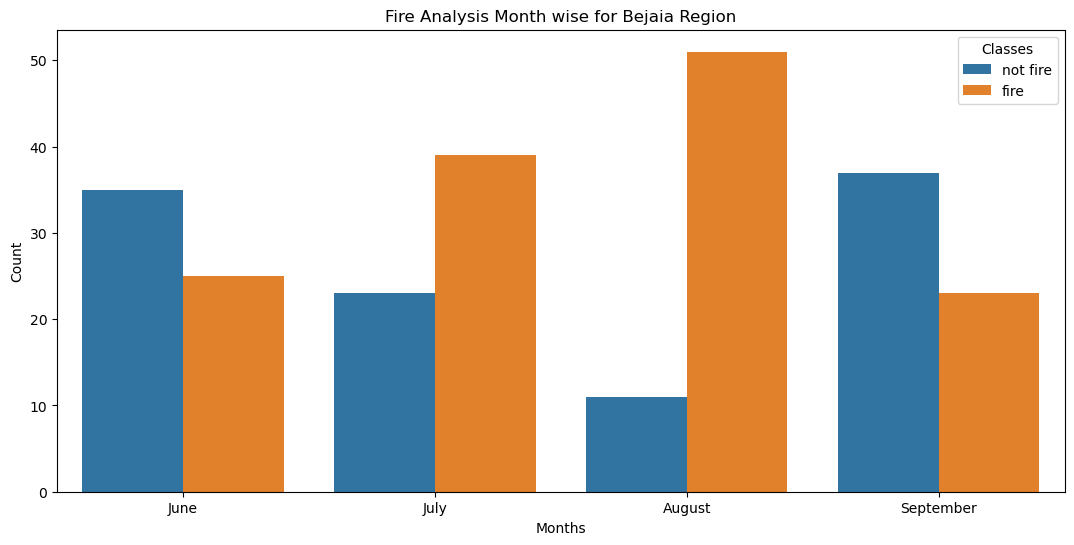

In [74]:
data_region = Data.loc[Data['Region']== 'Bejaia']
plt.figure(figsize=(13,6))
sns.countplot(x='month',hue='Classes', data= Data)
plt.title('Fire Analysis Month wise for Bejaia Region')
plt.ylabel('Count') 
plt.xlabel('Months')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.show()

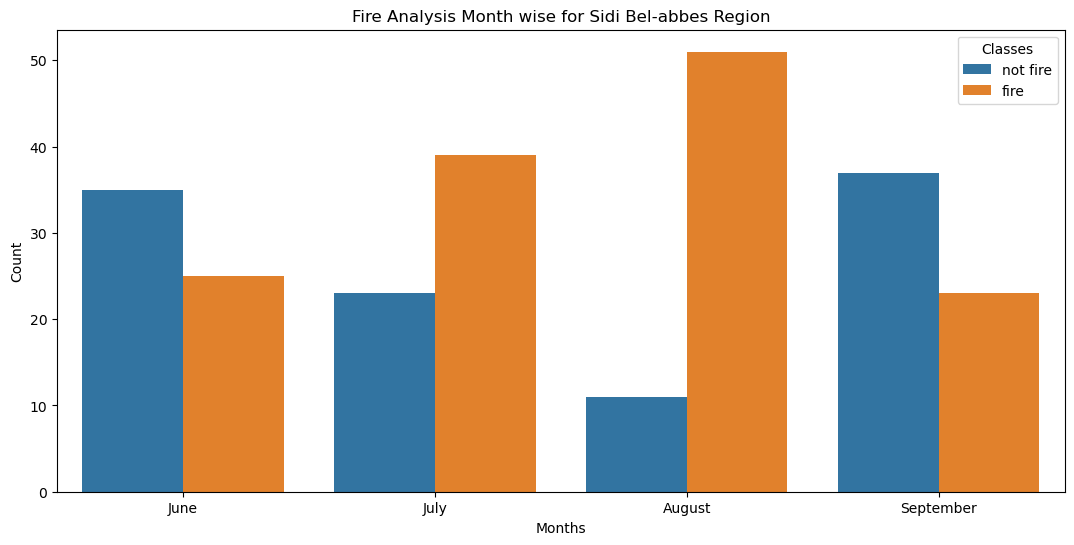

In [75]:
data_region = Data.loc[Data['Region']== 'Sidi Bel-abbes']
plt.figure(figsize=(13,6))
sns.countplot(x='month',hue='Classes', data= Data)
plt.title('Fire Analysis Month wise for Sidi Bel-abbes Region')
plt.ylabel('Count') 
plt.xlabel('Months')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.show()

## Observations and Insights
#### The maximum forest fire has occured in the month of August in both regions.
#### The minimum forest has occured in the month of September in both regions. 

## Check the effect of 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' on the probability of rainfall

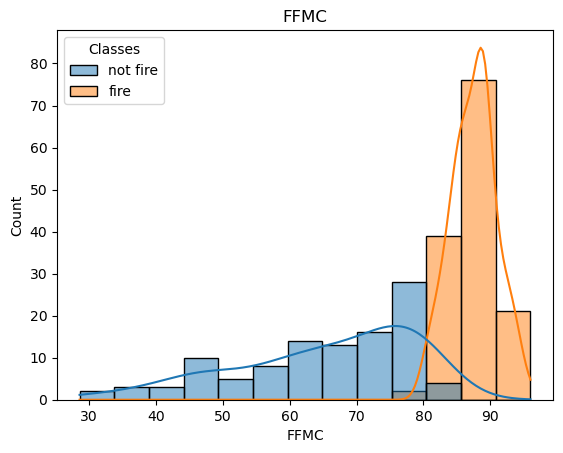

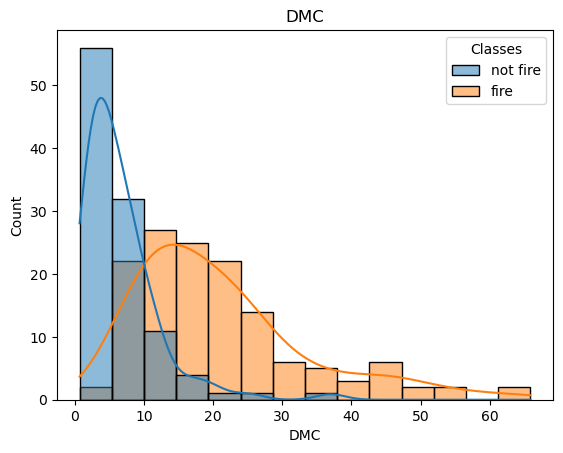

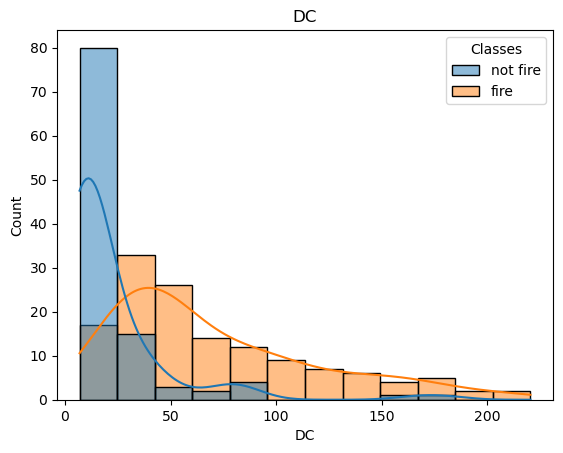

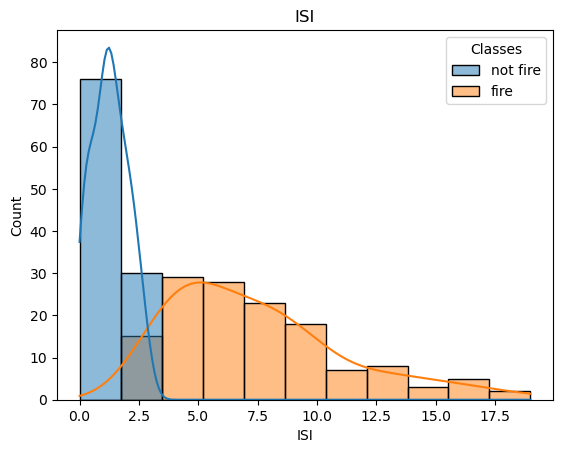

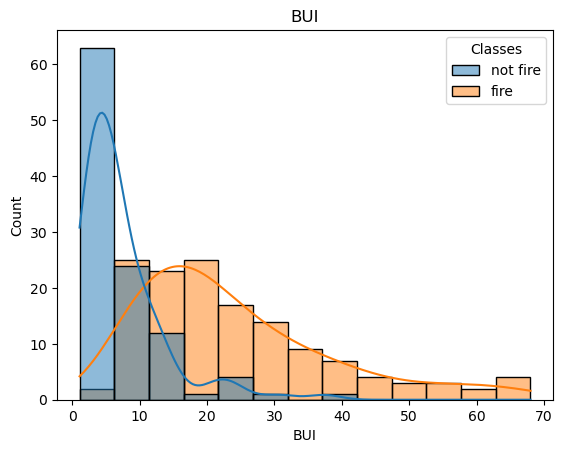

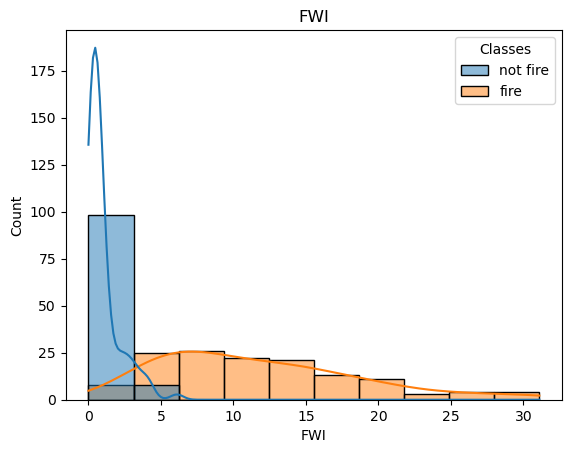

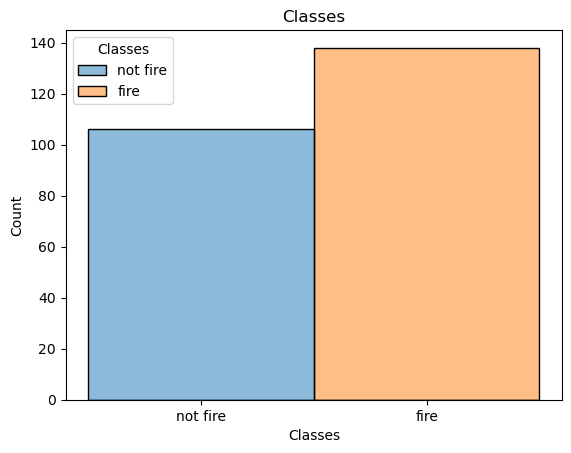

In [98]:
dftemp = Data.drop(['Region','Temperature','Rain','Ws','RH', 'day', 'month', 'year'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes', kde=True)
    plt.title(feature)
    plt.show()

## Observations and Inference 
#### FFMC above 75 has a high chance of forest fire.
#### DMC in the range 10-20 has a high chance of forest fire.
#### DC in the range 25-100 has a high chance of forest fire.
#### ISI in the range 3-12.5 has a high chance of forest fire. 
#### BUI in the range 10-40 has a high chance of forest fire.
#### FWI in the range 3-25 has a high chance of forest fire. 